**Christ-Brian Amedjonekou Test 1**

In [1]:
from School_Toolkit import Mathematical_Modeling as MM
import sympy as sp
import numpy as np
from matplotlib import pyplot as plt
from sympy.solvers import solve
import scipy.integrate as scint
import scipy.linalg as sci

## Question 1: Dynamical System

* ***Symbolic (Sympy) Functions***

In [2]:
sp.init_printing()
x1, x2 = sp.symbols('x1 x2')
dx1dt = -x1 + x1**2 + (x1*x2) - x2**2
dx2dt = x2 + (x1*x2)
(dx1dt, dx2dt)

* ***Numerical (Lambda Functions)***

In [3]:
dx1dt__ = lambda x1_, x2_: -x1_ + x1_**2 + (x1_*x2_) - x2_**2
dx2dt__ = lambda x1_, x2_: x2_ + (x1_*x2_)

### Part 1A: Equilibrium Points

In [4]:
# The following Code Computes the Equilibrium Points. 
# Answer to Part 1a:
solve([dx1dt, dx2dt], x1, x2)

### Part 1B: Classifying Equilibrium Points w/ Eigenvalue Method

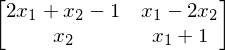

In [5]:
## The following code give the Jacobian Matrix used in the Eigenvalue Method
points = [[-1,-2],[-1,1],[0,0],[1,0]]
MM.poorManJacobian(dx1dt, dx2dt, x1, x2, points)

#### Evaluated at (-1,-2)

In [6]:
points = [[-1,-2]]
jac1 = MM.poorManJacobian(dx1dt, dx2dt, x1, x2, points, False)
jac1

array([[-5.,  3.],
       [-2.,  0.]])

* **The Eigenvalues below seem to show that the Equilibrium Point (-1,-2) is stable as they have negative real parts**

In [7]:
eigenvalues, eigenvectors = sci.eig(jac1)
eigenvalues

array([-3.+0.j, -2.+0.j])

#### Evaluated at (-1,1)

In [8]:
points = [[-1,1]]
jac2 = MM.poorManJacobian(dx1dt, dx2dt, x1, x2, points, False)
jac2

array([[-2., -3.],
       [ 1.,  0.]])

* **The Eigenvalues below seem to show that the Equilibrium Point (-1,1) is stable as they have negative real parts**

In [9]:
eigenvalues, eigenvectors = sci.eig(jac2)
eigenvalues

array([-1.+1.41421356j, -1.-1.41421356j])

In [10]:
eigenvectors

array([[ 0.8660254 +0.j        ,  0.8660254 -0.j        ],
       [-0.28867513-0.40824829j, -0.28867513+0.40824829j]])

#### Evaluated at (0,0)

In [11]:
points = [[0,0]]
jac3 = MM.poorManJacobian(dx1dt, dx2dt, x1, x2, points, False)
jac3

array([[-1.,  0.],
       [ 0.,  1.]])

* **The Eigenvalues below seem to show that the Equilibrium Point (0,0) is unstable as it has one positve real part**

In [12]:
eigenvalues, eigenvectors = sci.eig(jac3)
eigenvalues

array([-1.+0.j,  1.+0.j])

#### Evaluated at (1,0)

In [13]:
points = [[1,0]]
jac4 = MM.poorManJacobian(dx1dt, dx2dt, x1, x2, points, False)
jac4

array([[1., 1.],
       [0., 2.]])

* **The Eigenvalues below seem to show that the Equilibrium Point (1,0) is unstable as they have positive real parts**

In [14]:
eigenvalues, eigenvectors = sci.eig(jac4)
eigenvalues

array([1.+0.j, 2.+0.j])

### Part 1C: Linearize the system (Corrected)

* ***Numerical (Lambda Functions)***

In [15]:
dx1dt_L = lambda x1_, x2_: -2*x1_ - 3*x2_
dx2dt_L = lambda x1_, x2_: x1_

* **Linear Phase Portrait**

Title?: x1 vs x2 Population
x-axis label?: x1 Population
y-axis label?: x2 Population


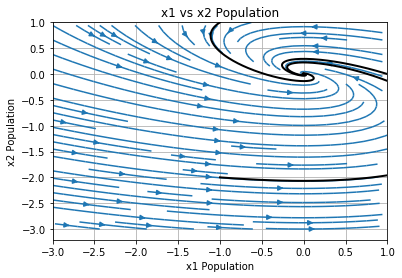

In [16]:
points = [[-1,-2],[-1,1],[0,0],[1,0]]
MM.phasePortrait(dx1dt_L, dx2dt_L, points, -3, 1)
plt.xlim(-3, 1);

#### General Solution

$x(n) = c_1 \lambda_1^n v_1 + c_2 \lambda_2^n v_2$

$x(n) = c_1 (-1.+1.41421356j)^n \left[{\begin{array}{cc}
   0.8660254 +0.j \\
   0.28867513-0.40824829j \\
  \end{array} } \right]  + c_2 (-1.-1.41421356j)^n \left[{\begin{array}{cc}
   0.8660254 -0.j \\
   0.28867513+0.40824829j \\
  \end{array} } \right]$

### Part 1D: Phase Portrait for nonlinear 

Title?: x1 vs x2 Population
x-axis label?: x1 Population
y-axis label?: x2 Population


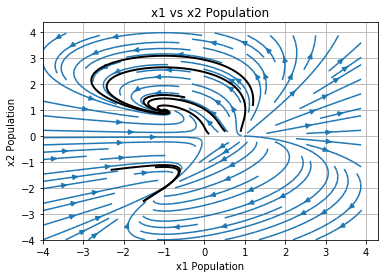

In [17]:
points = [[-1.5,-2.5],[-0.5,1.5],[1.2,1.2],[0.1, 0.1],[-1.5,-2.5],
          [-2.3, -1.3],[-1.2, -1.2], [0.9, 0.2], [0.5, 0.2]]
MM.phasePortrait(dx1dt__, dx2dt__, points, -4, 4) 

## Question 2: Dynamical System (Corrected)

In [18]:
k = 11
deltaX1 = 2*x1 + k*x2
deltaX2 = x1 - 4*x2
G1 = x1 + deltaX1
G2 = x2 + deltaX2
(G1, G2)

**Equilibrium Points**

In [19]:
solve([G1, G2], x1, x2)

### Classifying Equilibrium Points w/ Eigenvalue Method 

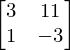

In [20]:
## The following code give the Jacobian Matrix used in the Eigenvalue Method
points = [[0, 0]]
MM.poorManJacobian(G1, G2, x1, x2, points)

#### Eigenvalues

In [21]:
jaK2 = MM.poorManJacobian(G1, G2, x1, x2, points, False)
eigenvalues, eigenvectors = sci.eig(jaK2)
eigenvalues

array([ 4.47213595+0.j, -4.47213595+0.j])

In [22]:
abs(eigenvalues)

array([4.47213595, 4.47213595])

* **Since the absolute value of the eigenvectors are both greater than 1 the system does not converge to the equilibrium and is not stable.**